# Data Loading

In [ ]:

import pandas as pd
import os
from os.path import exists
import zipfile
import numpy as np
from datetime import datetime

In [ ]:
SEED=42

In [ ]:
# !gdown https://drive.google.com/uc?id=1kl65YOvoSAMSgszQQbua2q4Zwe1HgPct
# !unzip -o "data.zip"  -d  "/content"

# movie_10k_df = pd.read_csv("movies_min.csv")
# amazon_df =pd.read_csv('amazon_min.csv')
# book_df=pd.read_csv("book_min.csv")
# food_df = pd.read_csv('food_min.csv')
# ecommerce_df=pd.read_csv('ecom_min.csv')
# ciao_df=pd.read_csv('ciao_min.csv')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown https://drive.google.com/uc?id=1Z7TljjdpUOHdxUdS2GiJMGdmMJ8hbCRt


Downloading...
From: https://drive.google.com/uc?id=1Z7TljjdpUOHdxUdS2GiJMGdmMJ8hbCRt
To: /content/fashon.zip
100% 593M/593M [00:08<00:00, 67.0MB/s]


In [ ]:
!unzip -o "fashon.zip"  -d  "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/myntradataset/images/5813.jpg  
  inflating: /content/myntradataset/images/58131.jpg  
  inflating: /content/myntradataset/images/58132.jpg  
  inflating: /content/myntradataset/images/58133.jpg  
  inflating: /content/myntradataset/images/58135.jpg  
  inflating: /content/myntradataset/images/58136.jpg  
  inflating: /content/myntradataset/images/58137.jpg  
  inflating: /content/myntradataset/images/58138.jpg  
  inflating: /content/myntradataset/images/58139.jpg  
  inflating: /content/myntradataset/images/5814.jpg  
  inflating: /content/myntradataset/images/58140.jpg  
  inflating: /content/myntradataset/images/58141.jpg  
  inflating: /content/myntradataset/images/58143.jpg  
  inflating: /content/myntradataset/images/58144.jpg  
  inflating: /content/myntradataset/images/58145.jpg  
  inflating: /content/myntradataset/images/58146.jpg  
  inflating: /content/myntradataset/images/58147.jpg  
  inflating: /co

#### Name of the file where user item interaction data avaiable?
- Column name should be in following name and order
- [ **id, [featues]** ]
- **id** should be name of **image**.Images are named as **id.jpeg**

In [ ]:
filename="myntradataset/styles.csv" #enter your filename with file path

In [ ]:
imagepath="myntradataset/images/"

### Code Setup

In [ ]:
item_df = pd.read_csv(filename,on_bad_lines='skip')


In [ ]:
item_df.head(1)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


name of itemid

In [ ]:
itemid='id'

In [ ]:
features=[ 'productDisplayName']

In [ ]:
item_df['image'] = item_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
item_df['image'] =imagepath+item_df['image'] 
item_df = item_df.reset_index(drop=True)

In [ ]:
item_df['NewTag']=""
for i in features:
  item_df['NewTag']+=('[SEP]'+item_df[i])
item_df['NewTag']=item_df['NewTag'].astype(str)

#Code

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

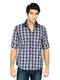

In [ ]:
import cv2
from IPython.display import display, Image
imagename=item_df['image'][0]
display(Image(filename=imagename))


#  TRANSFORMER

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8fe41d96b064381822f782d953bd5c2e36e565041cc038a2d123e0ca50be095f
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


#Load CLIP model

In [ ]:
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
import cv2
import PIL
from IPython.display import display, Image
torch.set_num_threads(4)

#First, we load the respective CLIP model
model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
def clean_text(text):
    
    text = text.lower()  # lowercase text
    # replace the matched string with ' '
    text = re.sub( re.compile("\'s"), ' ', text)
    text = re.sub(re.compile("\\r\\n"), ' ', text)
    text = re.sub(re.compile(r"[^\w\s]"), ' ', text)
    return text

In [ ]:
stopwords=set(stopwords.words('english'))

In [ ]:
def tokenizer(sentence, min_words=4, max_words=200, stopwords=stopwords, lemmatize=True):
    
    if lemmatize:
        stemmer = WordNetLemmatizer()
        tokens = [stemmer.lemmatize(w) for w in word_tokenize(sentence)]
    else:
        tokens = [w for w in word_tokenize(sentence)]
    token = [w for w in tokens if (len(w) > min_words and len(w) < max_words
                                                        and w not in stopwords)]
    return tokens    

In [ ]:
item_df['clean'] = item_df['NewTag'].apply(clean_text)
# content_df['token_lem_sentence'] = content_df['clean'].apply(
#         lambda x: tokenizer(x))

In [ ]:
corpus_embeddings = model.encode(item_df.clean.values, convert_to_tensor=True)

# Search 

In [ ]:
from sentence_transformers import SentenceTransformer, util


In [ ]:
query="blue t-shirt for men"

In [ ]:
query_embedding = model.encode(query, convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 3 scores
cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=10)

In [ ]:
recommedations_list=[]
for score, idx in zip(top_results[0], top_results[1]):
    score = score.cpu().data.numpy() 
    idx = idx.cpu().data.numpy()
    recommedations_list.append(item_df[[itemid]].iloc[idx][0])

In [ ]:
allcols=[itemid]
for i in features:
  allcols.append(i)
allcols.append('image')

In [ ]:
pd.set_option('display.max_colwidth', None)
item_df[item_df[itemid].isin(recommedations_list)][allcols]

,id,productDisplayName,image
9098,5718,Basics Men Blue T-shirt,myntradataset/images/5718.jpg
10873,21234,Basics Men Blue Printed T-shirt,myntradataset/images/21234.jpg
13702,9931,Basics Men Blue T-shirt,myntradataset/images/9931.jpg
15148,12207,Basics Men Blue Striped T-shirt,myntradataset/images/12207.jpg
23808,12194,Basics Men Blue Striped Polo T-shirt,myntradataset/images/12194.jpg
26474,29785,Basics Men Blue T-shirt,myntradataset/images/29785.jpg
31078,12211,Basics Men Blue Printed T-shirt,myntradataset/images/12211.jpg
39511,8554,Basics Men Blue T-shirt,myntradataset/images/8554.jpg
39577,12947,Basics Men Blue Striped T-shirt,myntradataset/images/12947.jpg
42613,12946,Basics Men Blue Striped T-shirt,myntradataset/images/12946.jpg


In [ ]:
img_names=list(item_df['image'].values)

In [ ]:

def searchimage(query, k=3):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    
    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits = util.semantic_search(query_emb, corpus_embeddings, top_k=k)[0]
    
    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(img_names[hit['corpus_id']], width=200))


Query:


'red t-shirt for women'

myntradataset/images/6906.jpg


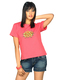

myntradataset/images/12601.jpg


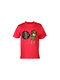

myntradataset/images/12603.jpg


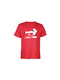

myntradataset/images/5816.jpg


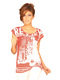

myntradataset/images/5174.jpg


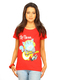

myntradataset/images/45960.jpg


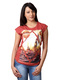

myntradataset/images/52086.jpg


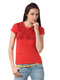

myntradataset/images/53120.jpg


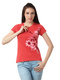

myntradataset/images/16131.jpg


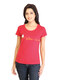

myntradataset/images/27347.jpg


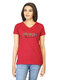

In [ ]:
query="red t-shirt for women"
searchimage(query, k=10)

# Search with FAISS

In [ ]:
!pip install faiss-cpu
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 84.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 13.0 MB/s eta 0:00:00


In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('clip-ViT-B-32')



In [ ]:
images_list=list(item_df['image'].values)

In [ ]:

print("Images:", len(images_list))
encoded_data = model.encode(item_df.clean.tolist())
encoded_data = np.asarray(encoded_data.astype('float32'))
index = faiss.IndexIDMap(faiss.IndexFlatIP(encoded_data.shape[1]))


Images: 44424


In [ ]:
index.add_with_ids(encoded_data, np.array(range(0, len(images_list))))
faiss.write_index(index, 'item.index')

### fetch details of the document

In [ ]:

def search(query, k):
    qv = model.encode([query], convert_to_tensor=False, show_progress_bar=False)
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    for hit in results:
     
        display(IPImage(hit, width=200))
    return results

### search

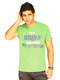

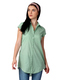

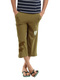

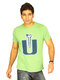

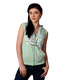

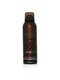

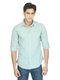

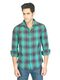

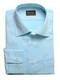

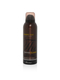

['myntradataset/images/4246.jpg',
 'myntradataset/images/43910.jpg',
 'myntradataset/images/54918.jpg',
 'myntradataset/images/4232.jpg',
 'myntradataset/images/54890.jpg',
 'myntradataset/images/46666.jpg',
 'myntradataset/images/28826.jpg',
 'myntradataset/images/28819.jpg',
 'myntradataset/images/12348.jpg',
 'myntradataset/images/46667.jpg']

In [ ]:
query="green t-shirt for man"
search(query, k=10)